In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [2]:
yearly_weather_df = pd.read_csv("resources/yearly_weather_data.csv")
production_df = pd.read_csv("resources/merged_weather_wine.csv")

production_df.head()

,Unnamed: 0,Year,County,HarvestedAcres,Yield(Ton Per Acre),Production(Tons),Price(Dollars Per Ton),Value(Dollars),Min. Temp(F),Max. Temp(F),Precip.(in),Temp Range(F)
0,0,2020,Marin,195.0,1.33,260.0,3607.69,938000,43.2,78.0,13.07,34.8
1,1,2020,Napa,45200.0,2.20,99300.0,4646.48,461395000,38.1,92.7,10.32,54.6
2,2,2020,Placer,315.0,2.79,879.0,2235.49,1965000,31.9,88.6,24.95,56.7
3,3,2020,SantaCruz,670.0,2.39,1600.0,3008.75,4814000,38.7,82.5,14.51,43.8
4,4,2020,Sonoma,56800.0,2.61,148000.0,2375.08,351512000,38.7,82.5,14.51,43.8


In [3]:
# Rename the county column from "Name" to "County"

# full_weather_df = full_weather_df.rename(columns={"Name": "County"})

# full_weather_df.head()

,County,Avg. Temp,Min. Temp,Max. Temp,Precip.,month,year
0,Marin,51.5,43.2,59.7,2.83,December,2020
1,Marin,53.5,44.2,62.8,1.54,November,2020
2,Marin,66.2,54.4,78.0,0.01,October,2020
3,Marin,66.8,56.7,77.0,0.00,September,2020
4,Marin,66.7,56.4,77.1,0.25,August,2020


In [6]:
sorted_df = production_df.sort_index(ascending=False)

sorted_df

,Unnamed: 0,Year,County,HarvestedAcres,Yield(Ton Per Acre),Production(Tons),Price(Dollars Per Ton),Value(Dollars),Min. Temp(F),Max. Temp(F),Precip.(in),Temp Range(F)
167,167,1980,Sonoma,23639.0,3.34,78941.0,506.00,39982000,39.2,75.9,31.29,36.7
166,166,1980,Napa,22261.0,3.60,80112.0,622.00,49863000,37.7,88.1,31.43,50.4
165,165,1981,Sonoma,23776.0,3.39,80675.0,590.00,47626000,41.5,80.6,35.89,39.1
164,164,1981,Napa,22152.0,3.62,80155.0,732.00,58659000,40.4,90.4,37.47,50.0
163,163,1982,Sonoma,24746.0,4.00,98979.0,565.00,55910300,34.9,77.6,54.26,42.7
...,...,...,...,...,...,...,...,...,...,...,...,...
4,4,2020,Sonoma,56800.0,2.61,148000.0,2375.08,351512000,38.7,82.5,14.51,43.8
3,3,2020,SantaCruz,670.0,2.39,1600.0,3008.75,4814000,38.7,82.5,14.51,43.8
2,2,2020,Placer,315.0,2.79,879.0,2235.49,1965000,31.9,88.6,24.95,56.7
1,1,2020,Napa,45200.0,2.20,99300.0,4646.48,461395000,38.1,92.7,10.32,54.6


In [12]:
def plot_line_graph(df, county):
    filtered = df[df["County"] == county]
    x_value = filtered["Year"]
    y_value = filtered["Precip.(in)"]
    y2_value = filtered["Yield(Ton Per Acre)"]

    fig, ax1 = plt.subplots()
#    fig = plt.figure()

    ax1.plot(x_value, y_value, label="Precipitation (inches)", color="blue")

    ax2 = ax1.twinx()

    ax2.plot(x_value, y2_value, label="Yeild per Acre (by ton)", color="purple")
    ax2.yaxis.tick_right()

    ax1.legend(loc="lower left")
    ax2.legend(loc="upper right")

    plt.title(county)

    plt.show()

#    plt.close(fig)


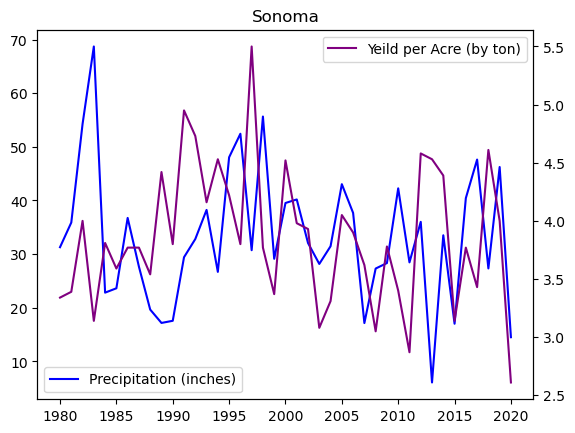

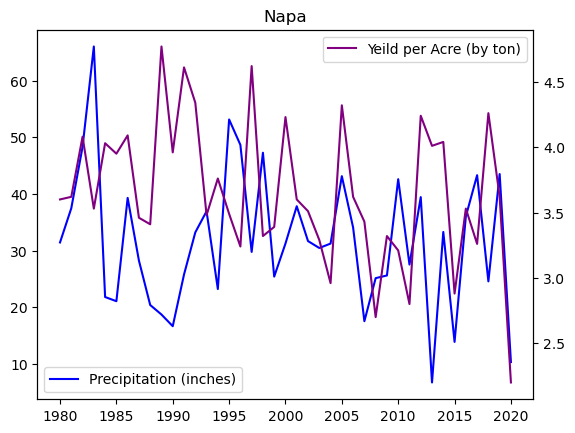

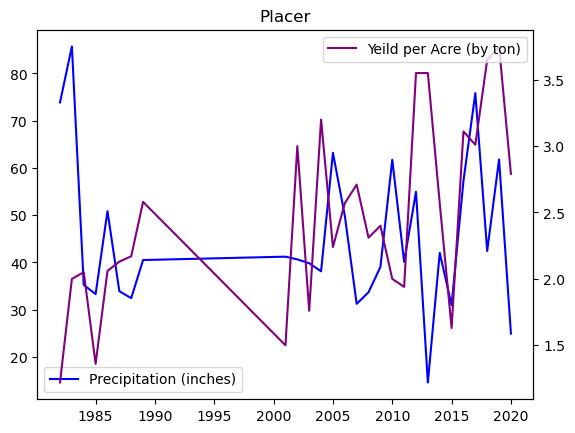

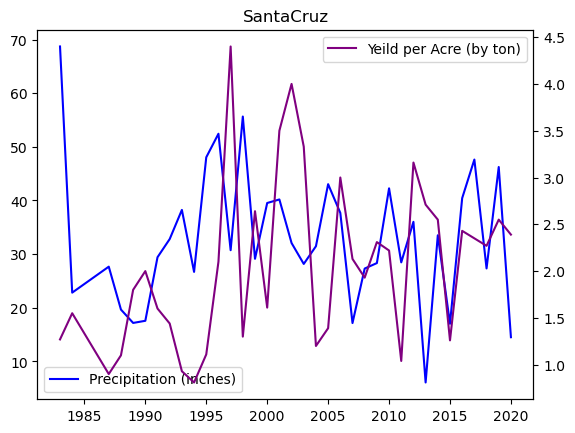

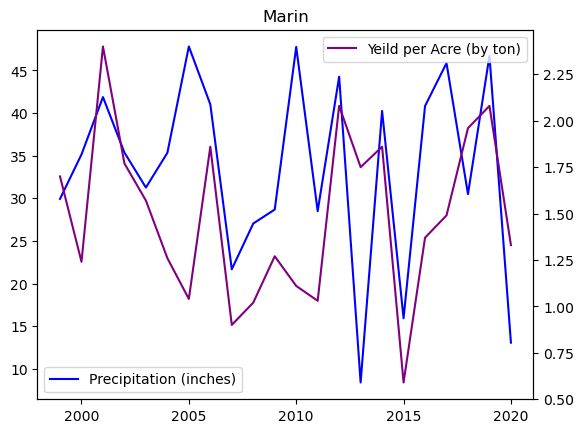

In [13]:
counties = sorted_df["County"].unique()

for county in counties:
    plot_line_graph(sorted_df, county)


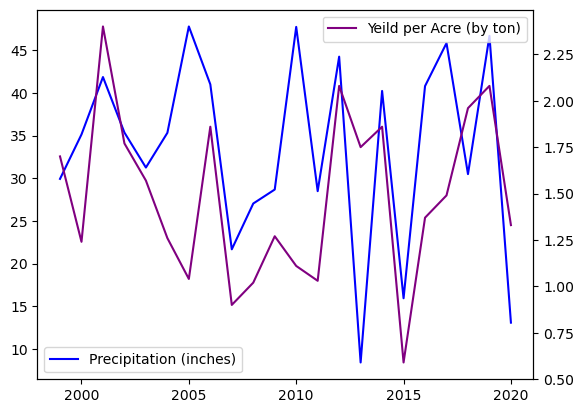

In [25]:
marin_years = sorted_df[sorted_df["County"] == "Marin"]["Year"]

# marin_years

temp_df = sorted_df[sorted_df["County"] == "Marin"]
temp_x = temp_df["Year"]
temp_y = temp_df["Precip.(in)"]
temp2_y = temp_df["Yield(Ton Per Acre)"]

fig, ax1 = plt.subplots()

ax1.plot(temp_x, temp_y, label="Precipitation (inches)", color="blue")

ax2 = ax1.twinx()

ax2.plot(temp_x, temp2_y, label="Yeild per Acre (by ton)", color="purple")
ax2.yaxis.tick_right()

ax1.legend(loc="lower left")
ax2.legend(loc="upper right")

plt.show()

# Yield(Unit/Acre)
# temp2_df = production_df[production_df["County"] == "Marin"]


# plt.plot(temp_x, temp2_y)
